# (Dataset Exploration Title)
## by (Mohammed Khalil)

## Preliminary Wrangling

Bay Wheels is a regional public bicycle sharing system in California's San Francisco Bay Area.

It is operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Bay Wheels is 'the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States. 

It was established as Bay Area Bike Share in August 2013. As of January 2018, the Bay Wheels system had over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose.

In June 2017 the system was officially re-launched as Ford GoBike in a partnership with Ford Motor Company.

After Motivate's acquisition by Lyft, the system was renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
df['member_age']= 2021-df['member_birth_year']

In [5]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [6]:
df['start_time_day_of_week']= df['start_time'].dt.strftime('%a')

In [7]:
df['start_hour_of_day'] = df.start_time.dt.strftime('%H')

In [8]:
df['member_age'].value_counts()

33.0     10236
28.0      9325
32.0      8972
31.0      8658
30.0      8498
         ...  
94.0         1
111.0        1
91.0         1
143.0        1
93.0         1
Name: member_age, Length: 75, dtype: int64

In [9]:
print(min(df['member_age']),max(df['member_age']))

20.0 143.0


In [10]:
df['member_age'].describe()

count    175147.000000
mean         36.193563
std          10.116689
min          20.000000
25%          29.000000
50%          34.000000
75%          41.000000
max         143.000000
Name: member_age, dtype: float64

### What is the structure of your dataset?

  1- Duration trip in Seconeds.

  2- Members Age.
  
  3- Location of stations (Lat/Long).
  
  4- Members Gender.
  
  5- Name of stations.
  
  6- Start/End station.
  
  7- Start/End time for bike rides.
  
  8- Id for Bikes and Stations.
  
### What is/are the main feature(s) of interest in your dataset?

 1- Members age.
 
 2- Rental time.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

 1- Start/End time for bike rides.
 
 2- Members age.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [11]:
df['duration_hours']= df['duration_sec']/3600

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [13]:
df.sample(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_time_day_of_week,start_hour_of_day,duration_hours
173298,131,2019-02-03 12:21:49.553,2019-02-03 12:24:00.572,73.0,Pierce St at Haight St,37.771793,-122.433708,85.0,Church St at Duboce Ave,37.770083,-122.429156,5543,Subscriber,1994.0,Female,No,27.0,Sun,12,0.036389


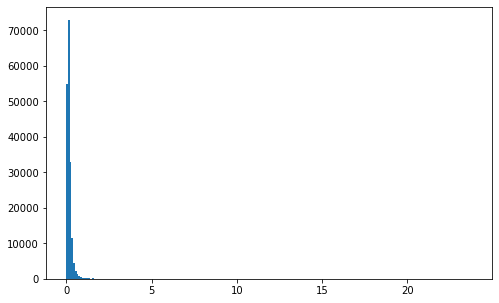

In [14]:
bins = np.arange(0, df['duration_hours'].max()+0.1, 0.1)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_hours', bins=bins);

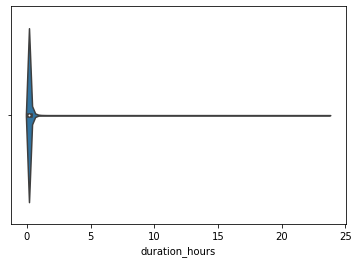

In [15]:
sb.violinplot(data = df, x = 'duration_hours');

##### It's seems that most data are below 1 hour.

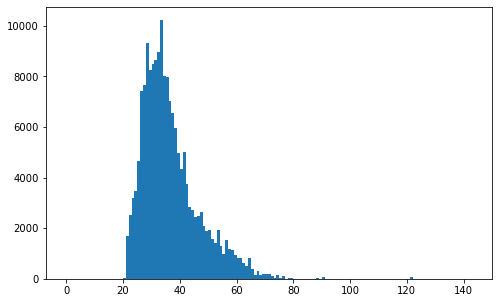

In [16]:
bins = np.arange(0, df['member_age'].max()+1, 1)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'member_age', bins=bins);

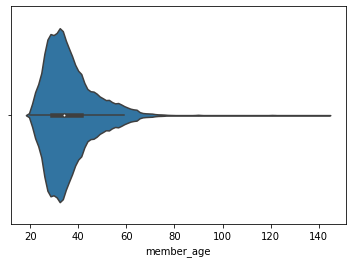

In [17]:
sb.violinplot(data = df, x = 'member_age');

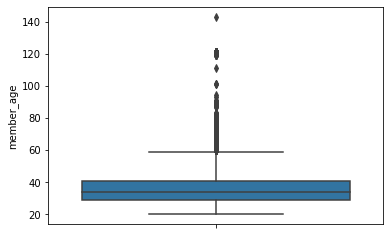

In [18]:
sb.boxplot(data = df, y = 'member_age');

##### It's seems that most data are between 20 - 60 years old, but there is someone his age is 143 years!!

In [19]:
df = df[df['member_age'] <= 60]

In [20]:
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df['start_time_day_of_week'] = df['start_time_day_of_week'].astype(ordered_weekdays)

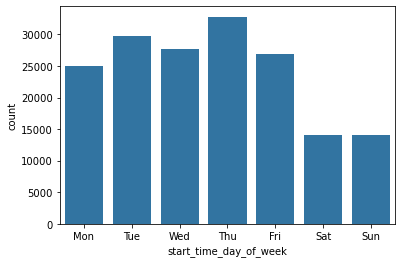

In [21]:
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'start_time_day_of_week', color = default_color);

##### It's seems Thursday has most bikers.

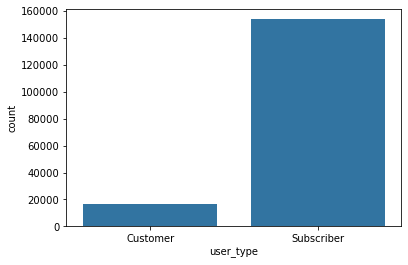

In [22]:
sb.countplot(data = df, x = 'user_type', color = default_color);

##### It's seems Subscriber are more than Customers.

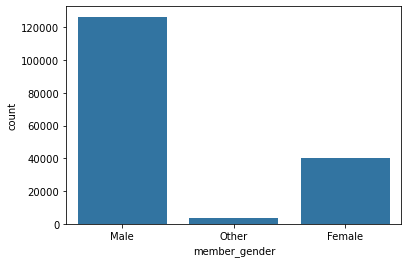

In [23]:
sb.countplot(data = df, x = 'member_gender', color = default_color);

##### It's seems Males are more than Females and other gender.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

1- we transform the duration time from seconed to hours for easily analysis.

2- we calculate the age of member from birthday member year.

3- (male/subscribers) are more than (female/customers).

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

we remove outlier like members age who bigger than 60 years old.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

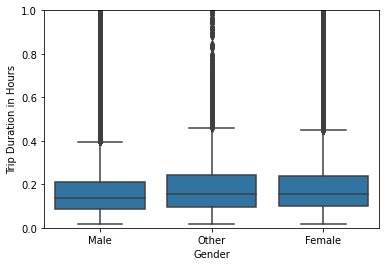

In [24]:
sb.boxplot(data=df, x='member_gender', y='duration_hours', color=default_color);
plt.xlabel('Gender');
plt.ylim(0, 1)
plt.ylabel('Trip Duration in Hours');

##### It seems like male riders tend to have shorter trips compared to female.

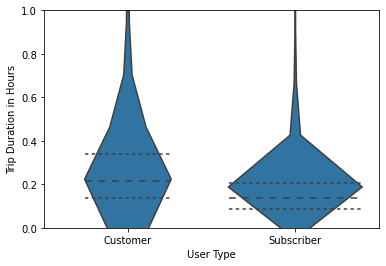

In [25]:
sb.violinplot(data=df, x='user_type', y='duration_hours', color=default_color, inner='quartile');
plt.ylim(0, 1)
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Hours');

##### It seems like subscribers have a more specific usage compared to customers.

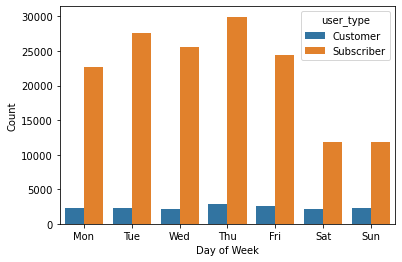

In [26]:
sb.countplot(data=df, x='start_time_day_of_week', hue='user_type');
plt.xlabel('Day of Week');
plt.ylabel('Count');

##### It seems like subscribers have a more weekly usage compared to customers.

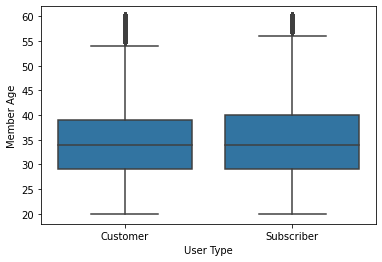

In [27]:
sb.boxplot(data=df, x='user_type', y='member_age', color=default_color);
plt.xlabel('User Type');
plt.ylabel('Member Age');

#### It seems like Subscriber users are slightly older than customer.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

1- male riders tend to have shorter trips compared to female.

2- subscribers have a more specific usage compared to customers.

3- subscribers have a more weekly usage compared to customers.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Subscriber users are slightly older than customer.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

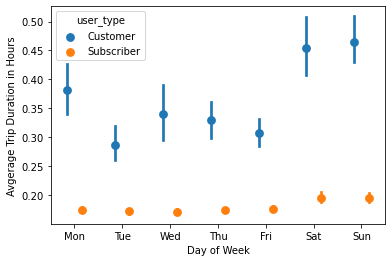

In [28]:
sb.pointplot(data=df, x='start_time_day_of_week', y='duration_hours', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day of Week');
plt.ylabel('Avgerage Trip Duration in Hours');

#### It seems like subscribers ride much shorter trips compared to customers on each day of the week.

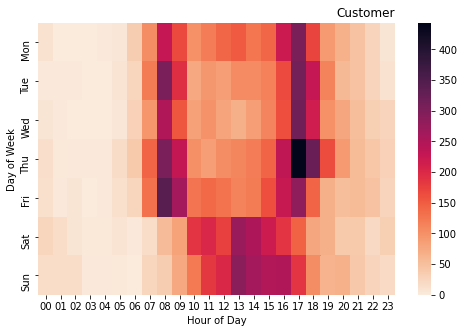

In [29]:
plt.figure(figsize=[8, 5])
customers = df.query('user_type == "Customer"')
cu_counts = customers.groupby(['start_time_day_of_week', 'start_hour_of_day']).size()
cu_counts = cu_counts.reset_index(name='count')
cu_counts = cu_counts.pivot(index='start_time_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(cu_counts, cmap='rocket_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

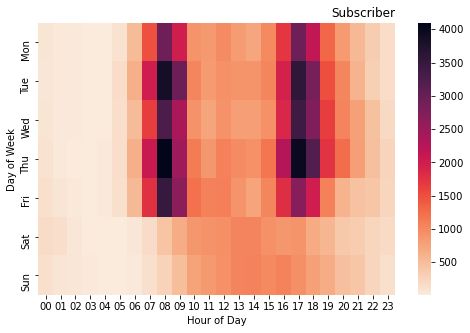

In [30]:
plt.figure(figsize=[8, 5])
subscribers = df.query('user_type == "Subscriber"')
su_counts = subscribers.groupby(['start_time_day_of_week', 'start_hour_of_day']).size()
su_counts = su_counts.reset_index(name='count')
su_counts = su_counts.pivot(index='start_time_day_of_week', columns='start_hour_of_day', values='count')
sb.heatmap(su_counts, cmap='rocket_r');
plt.title('Subscriber', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

#### Subscribers use it from Mon to Fri from especially (6-10 AM) & (16-19 AM) , Customers use it All days especially in afternoon.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Relationship between multiple variables are visualized,The features we investigated here are pretty much indenpendant from each other.

### Were there any interesting or surprising interactions between features?

1- Subscribers use it from Mon to Fri from especially (6-10 AM) & (16-19 AM) , Customers use it All days especially in afternoon.

2- subscribers ride much shorter trips compared to customers on each day of the week.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!